# Dødelighet og forventet levealder

Vi lar $X$ være levealderen til en tilfeldig valgt norsk mann. Vi vil regne levealderen i hele år, og antar  at de mulige verdiene av $X$ er $x=0,1,\ldots,106$. 

Fra dødelighetstabeller publisert av Statistisk Sentralbyrå (se https://www.ssb.no/statbank/table/07902) kan vi bestemme de ettårige dødssannsynlighetene $q_x=P(X=x\,|\, X \ge x)$. Vi bruker gjennomsnittet over femårsperioden 2014-2018 for å bestemme $q_x$-ene. 

Vi vil se hvordan vi ut fra $q_x$-ene kan bestemme den kumulative fordelingen $F(x)=P(X \le x)$, punktsannsynligheten $p(x)=P(X=x)$ og forventet levealder $E(X)=\sum_{x=0}^{106}x\cdot p(x)$. 

Vi importer først de Python bibilotekene vi vil bruke:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Vi leser så inn datafilen (som inneholder informasjon om dødeligheten for kvinner og menn) og trekker ut vektorer for alder og de ettårige dødssannsynlighetene for menn. Merk at på filen er dødssansynlighetene gitt i promille.

In [13]:
doed=pd.read_csv("/studier/emner/matnat/math/STK1100/data/doedelighet.txt",sep="\t")
alder=doed["alder"].values
menn=doed["menn"].values
kvinner=doed["kvinner"].values

Vi plotter dødssannsynlighetene per 1000 menn (dvs. $1000 q_x$) på logaritmisk skala og setter navn på aksene.

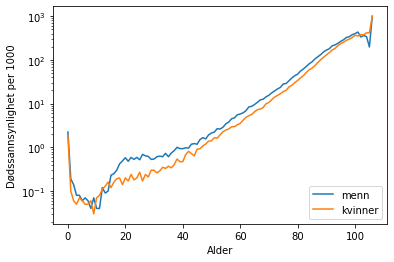

In [15]:
plt.semilogy(alder,menn)
plt.semilogy(alder,kvinner)
plt.xlabel("Alder")
plt.ylabel("Dødssannsynlighet per 1000")
plt.legend(["menn", "kvinner"], loc="lower right")
plt.show()

Vi deler på 1000 for å få de ettårige dødssannsynlighetene $q_x$.

In [17]:
qxM=menn/1000
qxK = kvinner/1000

Av produktsetningen har vi at 

$\quad P(X>x)=P(X>0)\cdot P(X>1\,|\, X>0) \cdots P(X>x\, |\, X>x-1)$

$\qquad\qquad\quad =P(X>0)\cdot P(X>1\, |\, X\ge 1) \cdots P(X>x\, |\, X\ge x)$

$\qquad\qquad\quad =(1-q_0)\cdot (1-q_1) \cdots (1-q_x)$

Vi får derfor overlevelsessannsynlighetene $S(x)=P(X>x)$ for $x=0,1,2,...,106$ ved følgende kommando:
 

In [19]:
SxM=np.cumprod(1-qxM)
SxK=np.cumprod(1-qxK)

Vi finner så den kumulative fordelingen 

$F(x)=P(X\le x)=1-P(X>x)=1-S(x)$ 

og lager så et plott av den.

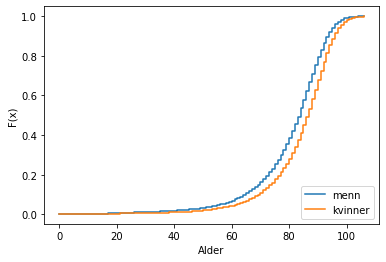

In [20]:
FxM=1-SxM
FxK = 1-SxK
plt.step(alder,FxM,where="post")
plt.step(alder,FxK,where="post")
plt.xlabel("Alder")
plt.ylabel("F(x)")
plt.legend(["menn", "kvinner"], loc="lower right")
plt.show()

Vi vil så bestemme punktsannsynligheten $p(x)=P(X=x)$. 

For $x=0,1,2,...,106$, har vi at $p(x)=F(x)-F(x-1)$. 

Videre har vi  at $p(0)=P(X=0)=P(X \le 0)=F(0)$. 

Vi finner derfor punktsannsynligheten ved kommandoene:

In [23]:
tmp=np.zeros(107)
tmp[1:107] = FxM[0:106]
pxM=FxM-tmp
tmp=np.zeros(107)
tmp[1:107] = FxK[0:106]
pxK=FxK-tmp

Vi lager så et sannsynlighetshistogram  som viser punktsannsynligheten.

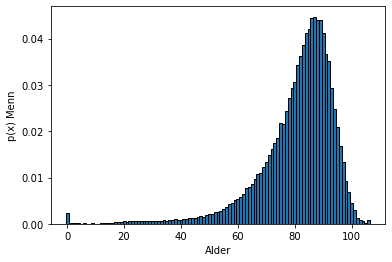

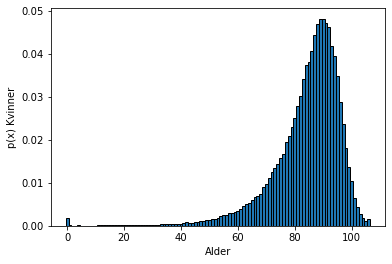

In [25]:
width=1
plt.bar(alder,pxM,width,edgecolor="black")
plt.xlabel("Alder")
plt.ylabel("p(x) Menn") 
plt.show()
width=1
plt.bar(alder,pxK,width,edgecolor="black")
plt.xlabel("Alder")
plt.ylabel("p(x) Kvinner") 
plt.show()

Forventet levealder for er gitt ved $E(X)=\sum_{x=0}^{106} x p(x)$.

In [27]:
x=alder
print(["Menn",np.sum(x*pxM)])
print(["Kvinner",np.sum(x*pxK)])

['Menn', 80.73242744103977]
['Kvinner', 84.11209596188651]


Etter våre beregninger er forventet levealder for norske menn  80.7 år og for kvinner 84.1 år. Siden dette er forventet levealder i hele år, blir det et halvt år lavere enn det Statistisk Sentralbyrå rapporterer. (Statistisk Sentralbyrå beregner forventet levealder for hvert kalenderår, og gjennomsnittet for de fem årene 2017-2021 er 81.2 og 84.6 år, henholdsvis.)

La oss så se på forventet gjenstående levetid ved alder a. Da bruker vi formelen $E[X-a|X\ge a]=\sum_{x=a}^{106}\frac{x-30}{1-F(a-1)}p(x)$

In [47]:
alist = [25,45,85]
FxM = np.cumsum(pxM)
FxK = np.cumsum(pxK)
for a in alist:
  print([a,np.sum((alder[a:107]-a)*pxM[a:107])/(1-FxM[a-1]),np.sum((alder[a:107]-a)*pxK[a:107])/(1-FxK[a-1])])

[25, 56.27276124567575, 59.46533171132291]
[45, 36.983282313731294, 39.85635845845586]
[85, 5.443251221783497, 6.54105450297673]


/tmp/ipykernel_635/2438843603.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  EaM[a] = np.sum((alder[a:107]-a)*pxM[a:107])/(1-FxM[a-1])
/tmp/ipykernel_635/2438843603.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  EaK[a] = np.sum((alder[a:107]-a)*pxK[a:107])/(1-FxK[a-1])


105
105


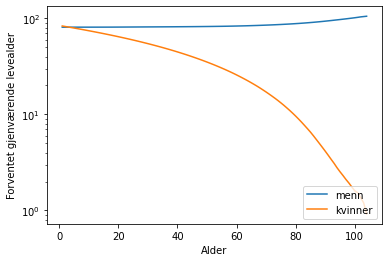

In [53]:
alist = np.arange(0,105)
EaM = [0 for x in range(105)]
EaK = [0 for x in range(105)]
FxM = np.cumsum(pxM)
FxK = np.cumsum(pxK)
for a in alist:
  EaM[a] = np.sum((alder[a:107]-a)*pxM[a:107])/(1-FxM[a-1])
  EaK[a] = np.sum((alder[a:107]-a)*pxK[a:107])/(1-FxK[a-1])
plt.semilogy(alist,EaM)
plt.semilogy(alist,EaK)
plt.xlabel("Alder")
plt.ylabel("Forventet gjenværende levealder")
plt.legend(["menn", "kvinner"], loc="lower right")
plt.show()

In [54]:
plt.semilogy(alist,EaM+alist)
plt.semilogy(alist,EaK+alist)
plt.xlabel("Alder")
plt.ylabel("Forventet dødstidspunkt gitt levd opp til a")
plt.legend(["menn", "kvinner"], loc="lower right")
plt.show()